In [1]:
import numpy as np

In [2]:
class MultiArmedBandit:
    def __init__(self, num_arms=10):
        self.num_arms = num_arms
        self.probs = np.random.rand(num_arms)  # reward probabilities for each arm

    def step(self,action):
        # Returns 1 with probability equal to that arm's true mean, else 0
        return 1 if  np.random.rand() < self.probs[action] else 0
    
class GaussianMultiArmedBandit:
    def __init__(self,num_arms=10):
        self.num_arms = num_arms
        self.means = np.random.normal(0,1,num_arms) # true mean for each arm
        self.stddevs = np.ones(num_arms) # fixed std for each arm

    def step(self, action):
        return np.random.normal(self.means[action], self.stddevs[action])

In [3]:
class EpsilonGreedy:
    def __init__(self,num_arms, epsilon=1.0):
        self.epsilon = epsilon
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(len(self.values))
        return np.argmax(self.values)
    
    def update(self,action,reward):
        self.counts[action] += 1
        alpha = 1 / self.counts[action]
        self.values[action] += alpha* (reward - self.values[action])

class UCB:
    def __init__(self,num_arms):
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)
        self.total_counts = 0

    def select_action(self):
        self.total_counts += 1
        if 0 in self.counts:
            return np.argmin(self.counts)
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts) / self.counts)
        return np.argmax(ucb_values)
    
    def update(self,action,reward):
        self.counts[action] += 1
        alpha = 1 / self.counts[action]
        self.values[action] += alpha* (reward - self.values[action])

class BernoulliThompsonSampling:
    def __init__(self,num_arms):
        self.alpha = np.ones(num_arms)
        self.beta = np.ones(num_arms)

    def select_action(self):
        return np.argmax(np.random.beta(self.alpha,self.beta))
    
    def update(self,action,reward):
        self.alpha[action] += reward
        self.beta[action] += (1 - reward)

class GaussianThompsonSampling:
    def __init__(self, num_arms):
        self.counts = np.zeros(num_arms)
        self.means = np.zeros(num_arms)
        self.variances = np.ones(num_arms) * 1.0   # can also be large to reflect uncertainty

    def select_action(self):
        samples = np.random.normal(self.means, np.sqrt(self.variances))
        return np.argmax(samples)

    def update(self, action, reward):
        self.counts[action] += 1
        alpha = 1 / self.counts[action]
        delta = reward - self.means[action]
        self.means[action] += alpha * delta
        self.variances[action] = (1 - alpha) * self.variances[action] + alpha * delta**2

In [4]:
import matplotlib.pyplot as plt

def run_bandit(env , agent, episodes=1000):
    rewards = []
    avg_rewards = []
    total_reward = 0

    for ep in range(1, episodes+1):
        action = agent.select_action()
        reward = env.step(action)
        agent.update(action, reward)

        total_reward += reward
        rewards.append(reward)
        avg_rewards.append(total_reward/ep)

        if ep%100 == 0:
            print(f"Episode {ep} | Avg Reward : {avg_rewards[-1]:.3f}")

    return rewards, avg_rewards

Episode 100 | Avg Reward : 0.730
Episode 200 | Avg Reward : 0.810
Episode 300 | Avg Reward : 0.850
Episode 400 | Avg Reward : 0.868
Episode 500 | Avg Reward : 0.870
Episode 600 | Avg Reward : 0.887
Episode 700 | Avg Reward : 0.891
Episode 800 | Avg Reward : 0.890
Episode 900 | Avg Reward : 0.890
Episode 1000 | Avg Reward : 0.889
Episode 1100 | Avg Reward : 0.893
Episode 1200 | Avg Reward : 0.892
Episode 1300 | Avg Reward : 0.895
Episode 1400 | Avg Reward : 0.898
Episode 1500 | Avg Reward : 0.902
Episode 1600 | Avg Reward : 0.904
Episode 1700 | Avg Reward : 0.904
Episode 1800 | Avg Reward : 0.907
Episode 1900 | Avg Reward : 0.910
Episode 2000 | Avg Reward : 0.909
Episode 100 | Avg Reward : 0.420
Episode 200 | Avg Reward : 0.485
Episode 300 | Avg Reward : 0.510
Episode 400 | Avg Reward : 0.530
Episode 500 | Avg Reward : 0.546
Episode 600 | Avg Reward : 0.582
Episode 700 | Avg Reward : 0.616
Episode 800 | Avg Reward : 0.629
Episode 900 | Avg Reward : 0.647
Episode 1000 | Avg Reward : 0.65

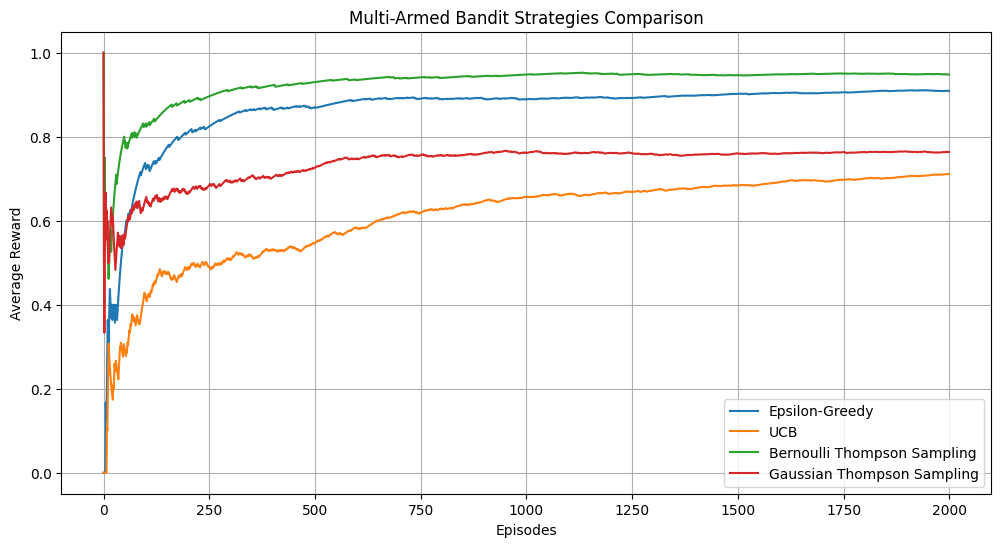

In [5]:
if __name__ == "__main__":
    episodes = 2000
    num_arms = 10

    env = MultiArmedBandit(num_arms=num_arms)

    agents ={
        "Epsilon-Greedy" : EpsilonGreedy(num_arms,epsilon=0.1),
        "UCB" : UCB(num_arms),
        "Bernoulli Thompson Sampling" : BernoulliThompsonSampling(num_arms),
        "Gaussian Thompson Sampling" : GaussianThompsonSampling(num_arms)
    }

    plt.figure(figsize=(12,6))

    for label, agent in agents.items():
        if label != "Gaussian Thomson Sampling":
            env = MultiArmedBandit(num_arms)
        else:
            env = GaussianMultiArmedBandit(num_arms)
        _,avg_rewards = run_bandit(env,agent,episodes)
        plt.plot(avg_rewards,label=label)

    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.title("Multi-Armed Bandit Strategies Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()